In [70]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import  itertools

sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [71]:
scaler = MinMaxScaler()

with open("../code/btree/build/Release/output.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
btree_df['Page'] = btree_df['Page'].astype(int)
btree_df['n'] = btree_df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)

btree_df['op_ns'] = btree_df['cpu_time'] / btree_df['n']

btree_df['RAM'] = btree_df['RAM'] + btree_df['Page']


btree_df['b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])


btree_df['cpu_time_ms_norm'] = scaler.fit_transform(btree_df[['cpu_time_ms']])
btree_df['RAM_norm'] = scaler.fit_transform(btree_df[['RAM']])
btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])



btree_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,...,Page,RAM,real_time_ms,cpu_time_ms,n,op_ns,b,cpu_time_ms_norm,RAM_norm,Page_norm
0,BM_MapInsertion<2>/20000000,0,0,BM_MapInsertion<2>/20000000,iteration,1,0,1,1,1.072065e+14,...,1294456,2544788,1.072065e+08,59359.375,20000000,2967.96875,2,0.000000,1.000000,1.000000
1,BM_MapInsertion<4>/20000000,1,0,BM_MapInsertion<4>/20000000,iteration,1,0,1,1,1.072346e+14,...,539168,1063908,1.072346e+08,86968.750,20000000,4348.43750,4,0.170791,0.355621,0.355545
2,BM_MapInsertion<6>/20000000,2,0,BM_MapInsertion<6>/20000000,iteration,1,0,1,1,1.072546e+14,...,375208,740108,1.072546e+08,106484.375,20000000,5324.21875,6,0.291514,0.214726,0.215645
3,BM_MapInsertion<8>/20000000,3,0,BM_MapInsertion<8>/20000000,iteration,1,0,1,1,1.072719e+14,...,302968,596900,1.072719e+08,123265.625,20000000,6163.28125,8,0.395322,0.152411,0.154006
4,BM_MapInsertion<16>/20000000,4,0,BM_MapInsertion<16>/20000000,iteration,1,0,1,1,1.072842e+14,...,202252,400248,1.072842e+08,135156.250,20000000,6757.81250,16,0.468877,0.066842,0.068069
5,BM_MapInsertion<32>/20000000,5,0,BM_MapInsertion<32>/20000000,iteration,1,0,1,1,1.072938e+14,...,156320,309792,1.072938e+08,144640.625,20000000,7232.03125,32,0.527547,0.027481,0.028878
6,BM_MapInsertion<64>/20000000,6,0,BM_MapInsertion<64>/20000000,iteration,1,0,1,1,1.073031e+14,...,135372,268680,1.073031e+08,153750.000,20000000,7687.50000,64,0.583897,0.009592,0.011004
7,BM_MapInsertion<128>/20000000,7,0,BM_MapInsertion<128>/20000000,iteration,1,0,1,1,1.073130e+14,...,129468,256996,1.073130e+08,163312.500,20000000,8165.62500,128,0.643050,0.004508,0.005966
8,BM_MapInsertion<256>/20000000,8,0,BM_MapInsertion<256>/20000000,iteration,1,0,1,1,1.073239e+14,...,135368,267676,1.073239e+08,174062.500,20000000,8703.12500,256,0.709550,0.009155,0.011000
9,BM_MapInsertion<512>/20000000,9,0,BM_MapInsertion<512>/20000000,iteration,1,0,1,1,1.073361e+14,...,142356,280852,1.073361e+08,186078.125,20000000,9303.90625,512,0.783878,0.014888,0.016963


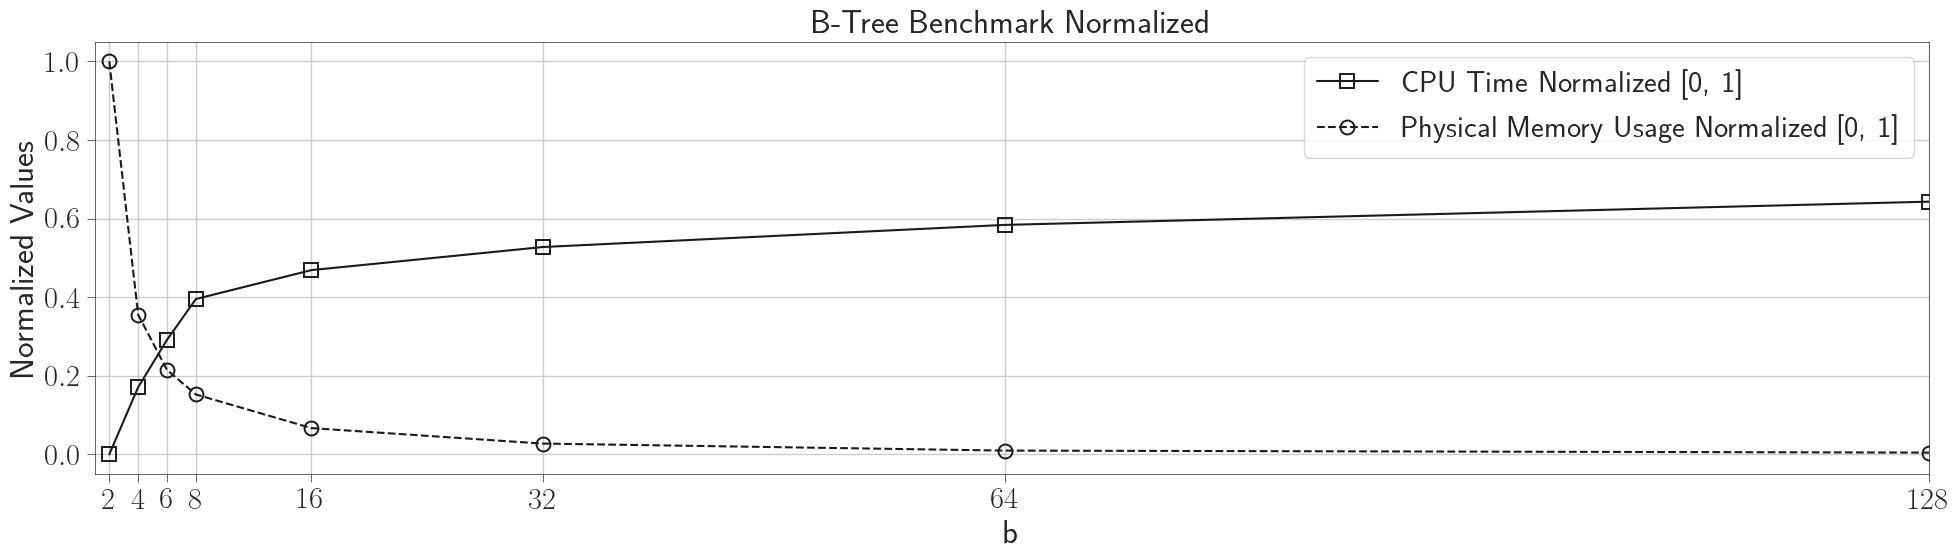

In [72]:
# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms_norm',
    marker='s',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='CPU Time Normalized [0, 1]',
    ax=ax
)

sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM_norm',
    marker='o',
    markerfacecolor='none',
    linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='Physical Memory Usage Normalized [0, 1]',
    ax=ax
)

ax.set_title("B-Tree Benchmark Normalized")
ax.set_xlabel('b')
ax.set_ylabel('Normalized Values')
ax.grid(True)
ax.legend()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks(btree_df['b'])

plt.xlim([1, 128])

plt.tight_layout()
plt.savefig('plot/'+ ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()

In [73]:
"optimum b = " + str(btree_df.loc[np.argmin(np.abs(btree_df['RAM_norm'] - btree_df['cpu_time_ms_norm'])), 'b'])

'optimum b = 6'

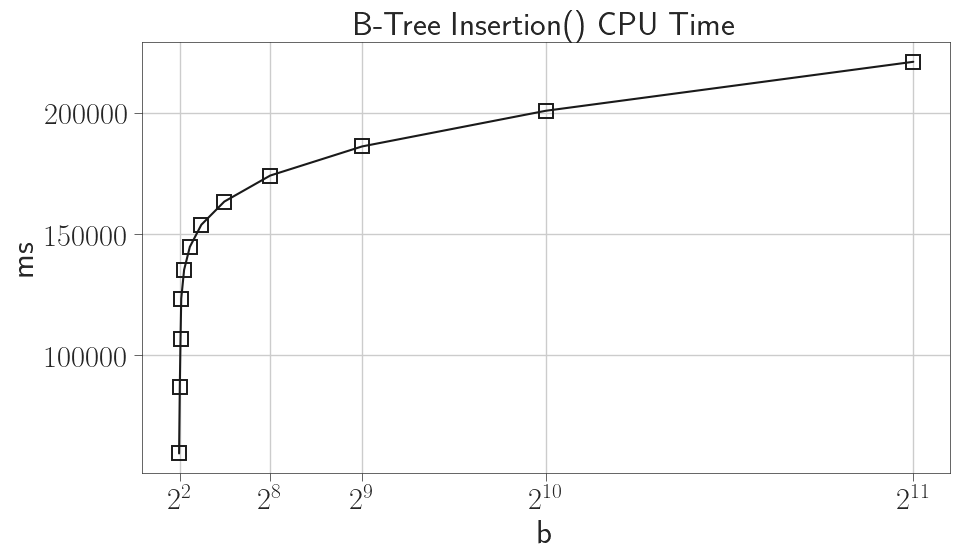

In [74]:
# Plot the data

from matplotlib.ticker import FuncFormatter

def log_tick_formatter(val, pos=None):
    return f'$2^{{{int(np.log2(val))}}}$'

fig, ax = plt.subplots(figsize=(10, 6))


sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms',
    marker='s',
    markerfacecolor='none',
    # linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='ms',
    ax=ax
)

ax.set_title("B-Tree Insertion() CPU Time")
ax.set_xlabel('b')
ax.set_ylabel('ms')
ax.grid(True)
ax.legend().remove()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks( [2**2] + list(btree_df['b'])[8:])
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
# plt.xlim([1, 128.5])
# plt.ylim([0.5E5, 2.5E5])

plt.tight_layout()
plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()

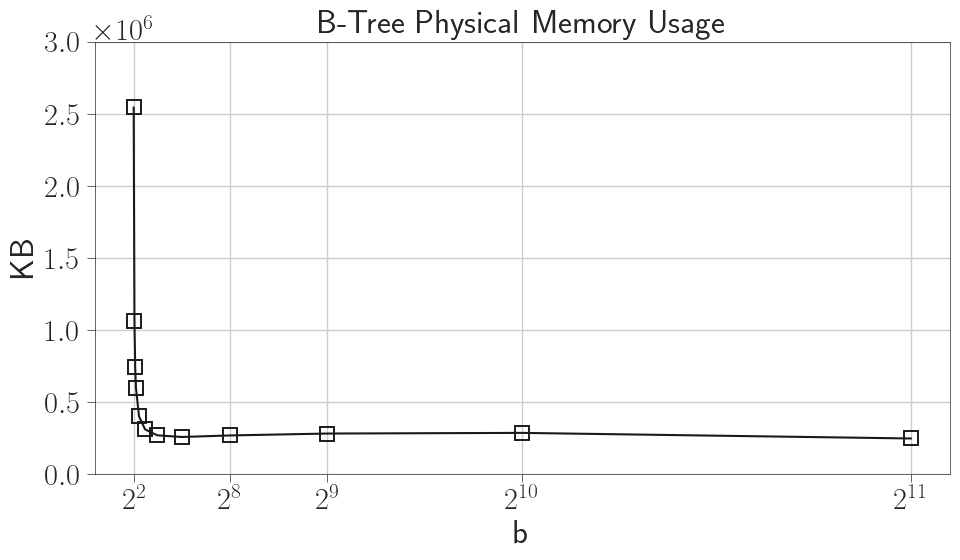

In [75]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
min_value = btree_df['RAM'].min()


sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM',
    marker='s',
    markerfacecolor='none',
    # linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='KB',
    ax=ax
)

ax.set_title("B-Tree Physical Memory Usage")
ax.set_xlabel('b')
ax.set_ylabel('KB')
ax.grid(True)
ax.legend().remove()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks( [2**2] + list(btree_df['b'])[8:])
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

plt.ylim([0, 3E6])

plt.tight_layout()
plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()


Second part

In [76]:
with open("../code/btree/build/Release/b-tree-vs-orderemap.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

# btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
# btree_df['Page'] = btree_df['Page'].astype(int)

btree_df['n'] = btree_df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)

btree_df['op_ns'] = btree_df['cpu_time'] / btree_df['n']

btree_df['b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
btree_df['operation'] = btree_df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

# btree_df['cpu_time_ms_norm'] = (btree_df['cpu_time_ms'] - btree_df['cpu_time_ms'].min()) / (btree_df['cpu_time_ms'].max() - btree_df['cpu_time_ms'].min())
btree_df['RAM_norm'] = (btree_df['RAM'] - btree_df['RAM'].min()) / (btree_df['RAM'].max() - btree_df['RAM'].min())
# btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])

btree_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,Page,RAM,cpu_time_ms,n,op_ns,b,operation,RAM_norm
0,OrderedMap,0,0,OrderedMap_Insertion/8,iteration,1,0,1,1,2.436404e+14,0.000000e+00,ns,0.0,4,0.000,8,0.000000,NaN,Insertion,0.000002
1,OrderedMap,0,1,OrderedMap_Insertion/16,iteration,1,0,1,1,2.436404e+14,0.000000e+00,ns,0.0,0,0.000,16,0.000000,NaN,Insertion,0.000000
2,OrderedMap,0,2,OrderedMap_Insertion/32,iteration,1,0,1,1,2.436404e+14,0.000000e+00,ns,0.0,0,0.000,32,0.000000,NaN,Insertion,0.000000
3,OrderedMap,0,3,OrderedMap_Insertion/64,iteration,1,0,1,1,2.436404e+14,0.000000e+00,ns,0.0,0,0.000,64,0.000000,NaN,Insertion,0.000000
4,OrderedMap,0,4,OrderedMap_Insertion/128,iteration,1,0,1,1,2.436404e+14,0.000000e+00,ns,0.0,0,0.000,128,0.000000,NaN,Insertion,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,BTreeMap,9,18,BTreeMap_Search<6>/2097152,iteration,1,0,1,1,2.453389e+14,1.664812e+12,ns,47716.0,46520,1664812.500,2097152,793844.461441,6.0,Search,0.020870
226,BTreeMap,9,19,BTreeMap_Search<6>/4194304,iteration,1,0,1,1,2.453451e+14,1.670812e+12,ns,94892.0,92648,1670812.500,4194304,398352.742195,6.0,Search,0.041564
227,BTreeMap,9,20,BTreeMap_Search<6>/8388608,iteration,1,0,1,1,2.453593e+14,1.684578e+12,ns,190344.0,185692,1684578.125,8388608,200817.361474,6.0,Search,0.083306
228,BTreeMap,9,21,BTreeMap_Search<6>/16777216,iteration,1,0,1,1,2.453960e+14,1.720281e+12,ns,380644.0,240428,1720281.250,16777216,102536.752820,6.0,Search,0.107861


In [77]:

btree_df.drop(columns=['real_time', 'cpu_time','iterations', 'repetition_index', 'run_name', 'repetitions', 'threads', 'run_type', 'family_index', 'per_family_instance_index', 'time_unit', 'Page', 'real_time'], inplace=True)

btree_df.rename(columns={
    'cpu_time_ms_norm': 'CPU Time Normalized [0, 1]',
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
    'RAM_norm': 'Physical Memory Usage Normalized [0, 1]',
    'op_ns': 'Average Running Time (ns/op)',
}, inplace=True)

btree_df

,name,Physical Memory Usage (KB),CPU Time (ms),n,Average Running Time (ns/op),b,operation,"Physical Memory Usage Normalized [0, 1]"
0,OrderedMap,4,0.000,8,0.000000,NaN,Insertion,0.000002
1,OrderedMap,0,0.000,16,0.000000,NaN,Insertion,0.000000
2,OrderedMap,0,0.000,32,0.000000,NaN,Insertion,0.000000
3,OrderedMap,0,0.000,64,0.000000,NaN,Insertion,0.000000
4,OrderedMap,0,0.000,128,0.000000,NaN,Insertion,0.000000
...,...,...,...,...,...,...,...,...
225,BTreeMap,46520,1664812.500,2097152,793844.461441,6.0,Search,0.020870
226,BTreeMap,92648,1670812.500,4194304,398352.742195,6.0,Search,0.041564
227,BTreeMap,185692,1684578.125,8388608,200817.361474,6.0,Search,0.083306
228,BTreeMap,240428,1720281.250,16777216,102536.752820,6.0,Search,0.107861


In [78]:
names = btree_df['name'].unique().tolist()
operations = btree_df['operation'].unique()


df_filtered_btree = btree_df[btree_df['name'] == 'BTreeMap']
df_filtered_map = btree_df[btree_df['name'] == 'OrderedMap']

exclude_columns = ['name', 'n', 'operation', 'b']

unique_names = btree_df['name'].unique().tolist()
print(unique_names)
print(operations)

btree_df

['OrderedMap', 'BTreeMap']
['Insertion' 'Search']


,name,Physical Memory Usage (KB),CPU Time (ms),n,Average Running Time (ns/op),b,operation,"Physical Memory Usage Normalized [0, 1]"
0,OrderedMap,4,0.000,8,0.000000,NaN,Insertion,0.000002
1,OrderedMap,0,0.000,16,0.000000,NaN,Insertion,0.000000
2,OrderedMap,0,0.000,32,0.000000,NaN,Insertion,0.000000
3,OrderedMap,0,0.000,64,0.000000,NaN,Insertion,0.000000
4,OrderedMap,0,0.000,128,0.000000,NaN,Insertion,0.000000
...,...,...,...,...,...,...,...,...
225,BTreeMap,46520,1664812.500,2097152,793844.461441,6.0,Search,0.020870
226,BTreeMap,92648,1670812.500,4194304,398352.742195,6.0,Search,0.041564
227,BTreeMap,185692,1684578.125,8388608,200817.361474,6.0,Search,0.083306
228,BTreeMap,240428,1720281.250,16777216,102536.752820,6.0,Search,0.107861


bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


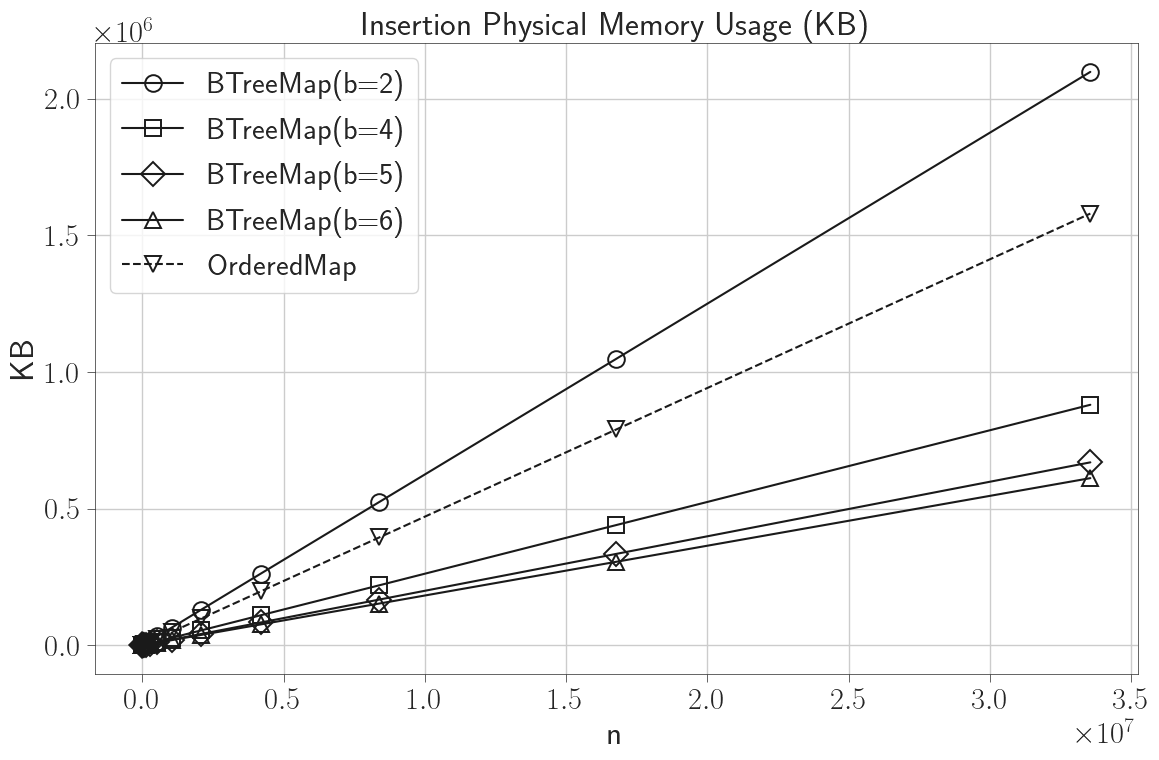

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
om CPU Time (ms)


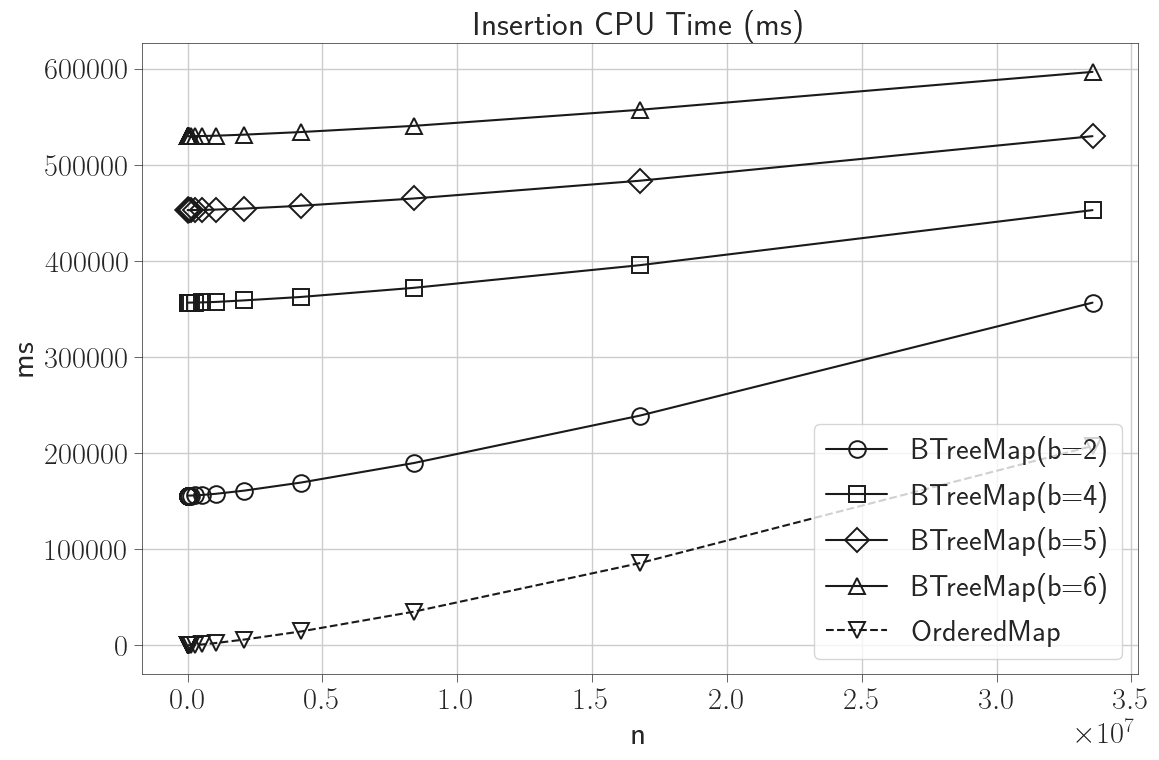

bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
om Average Running Time (ns/op)


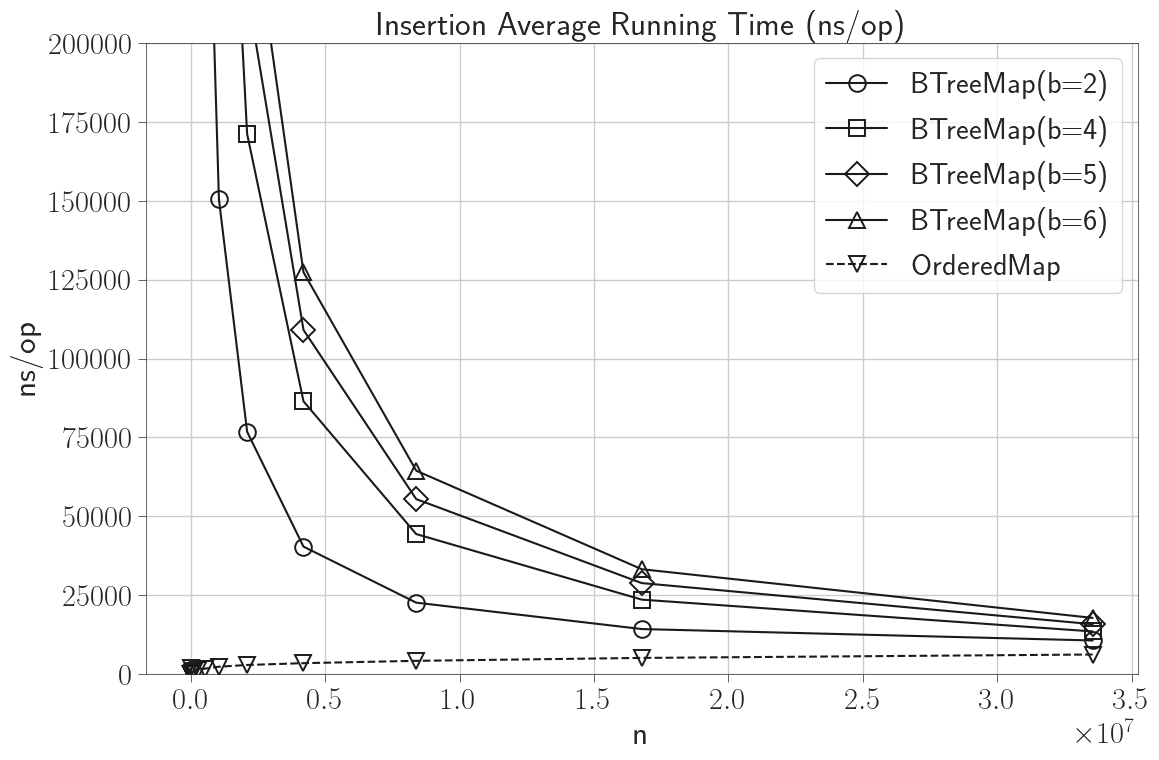

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
om Physical Memory Usage Normalized [0, 1]


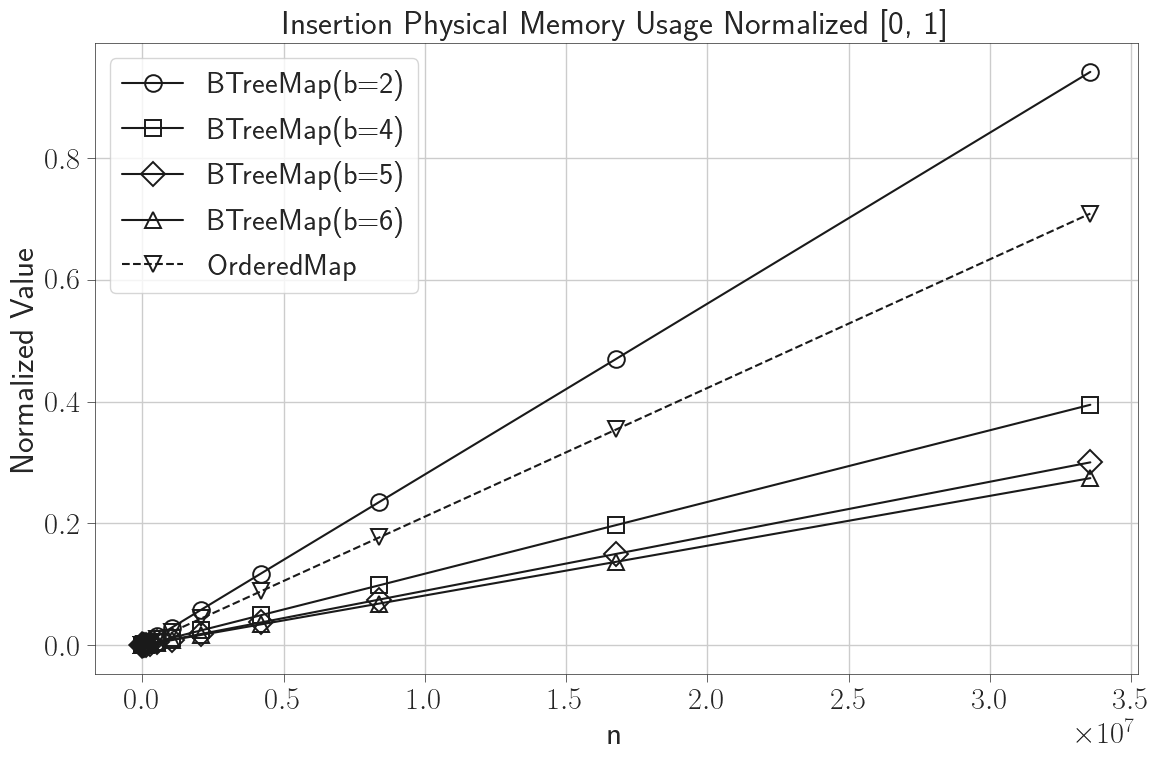

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


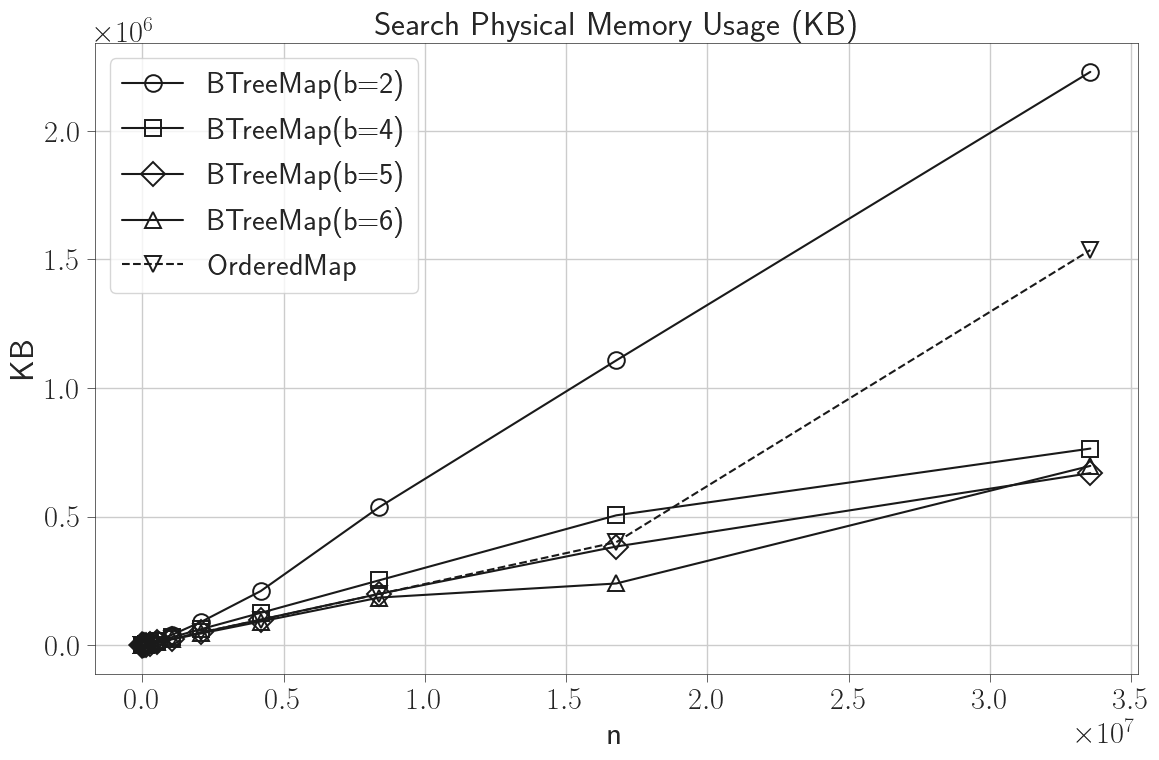

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
om CPU Time (ms)


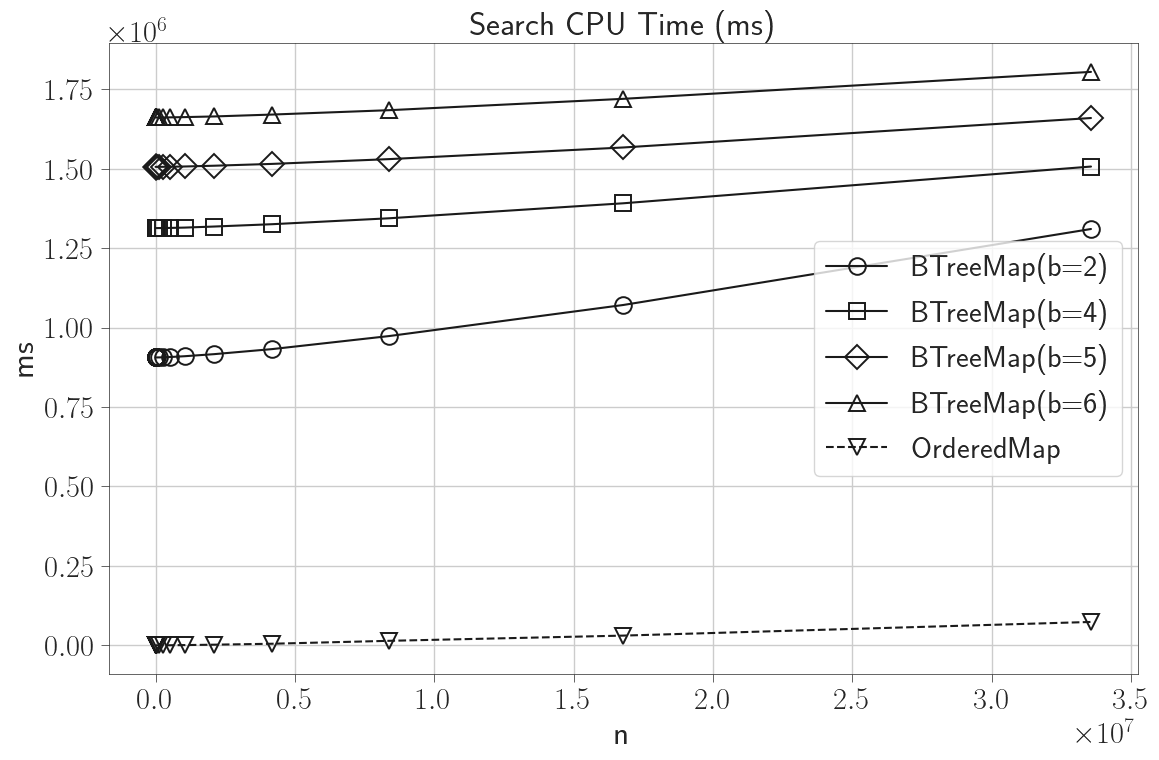

bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
om Average Running Time (ns/op)


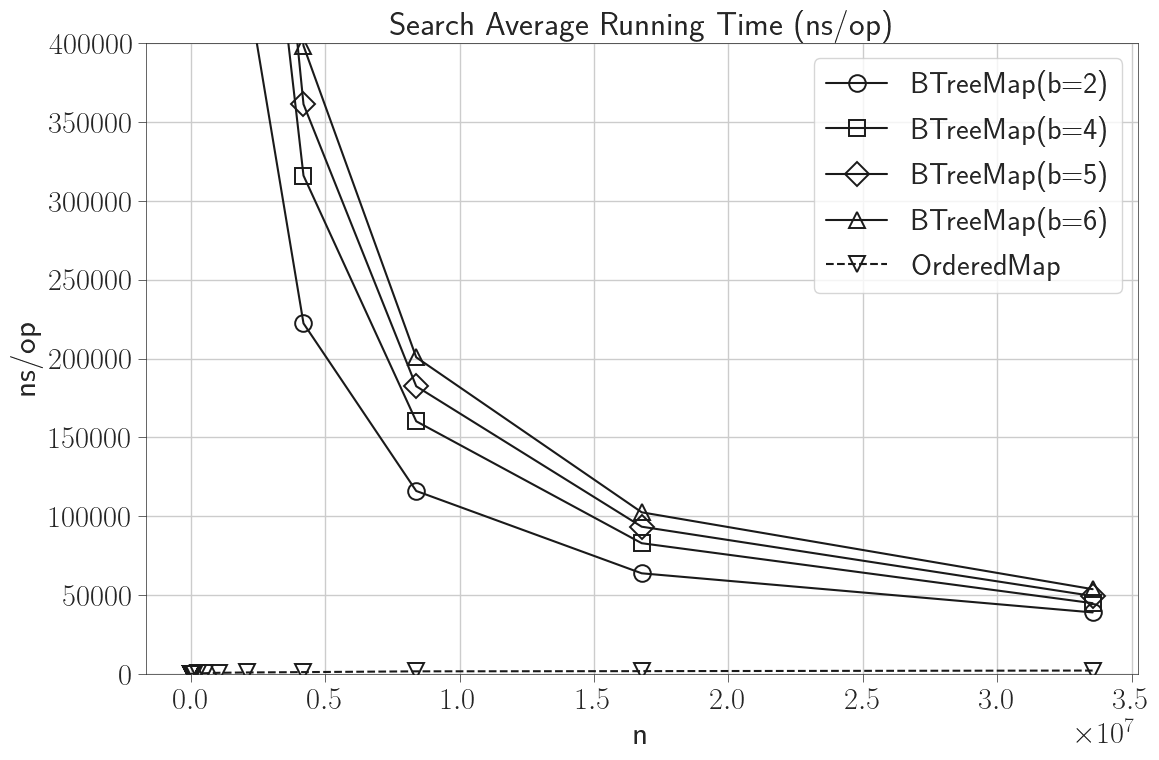

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
om Physical Memory Usage Normalized [0, 1]


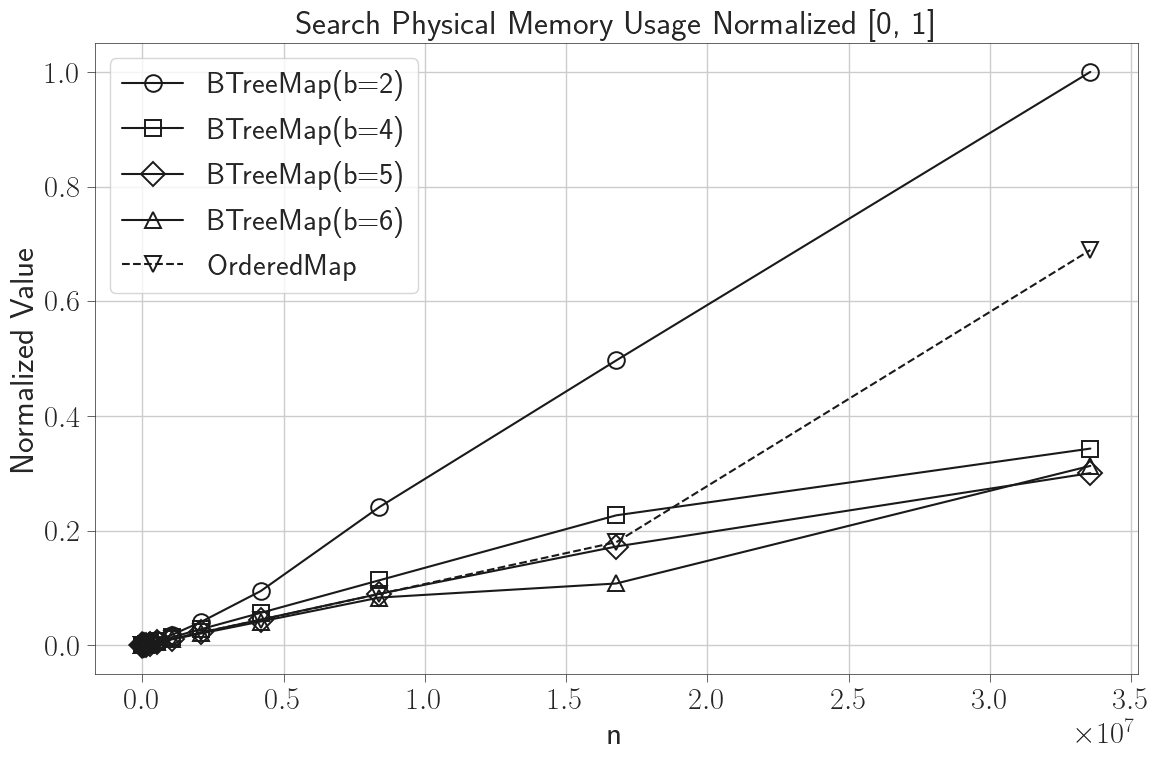

In [79]:
# Get unique names

# Columns to exclude from plotting

# Plot each unique name

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_filtered_btree_op = df_filtered_btree[df_filtered_btree['operation'] == op]
    df_filtered_map_op = df_filtered_map[df_filtered_map['operation'] == op]

    for column in df_filtered_btree.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(12, 8))

            marker_cyc = itertools.cycle(markers)

            for b in df_filtered_btree_op['b'].unique():
                print(f'bt {column}')
                sns.lineplot(
                    data=df_filtered_btree_op[df_filtered_btree_op['b'] == b],
                    x='n',
                    y=column,
                    marker=next(marker_cyc),
                    markerfacecolor='none',
                    markeredgecolor='k',
                    markeredgewidth=1.4,
                    markersize=12,
                    color='k',
                    linewidth=1.5,
                    label= f'BTreeMap(b={int(b)})',
                    ax=ax
                )

            print(f'om {column}')
            sns.lineplot(
                data=df_filtered_map_op,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            if "op" in column and "Insertion" in op :
                plt.ylim([0,0.2E6])

            if "op" in column and "Search" in op :
                plt.ylim([0,0.4E6])


            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.tight_layout()
            plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_').replace('/', '_') + '.pdf', bbox_inches='tight')
            plt.show()

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)


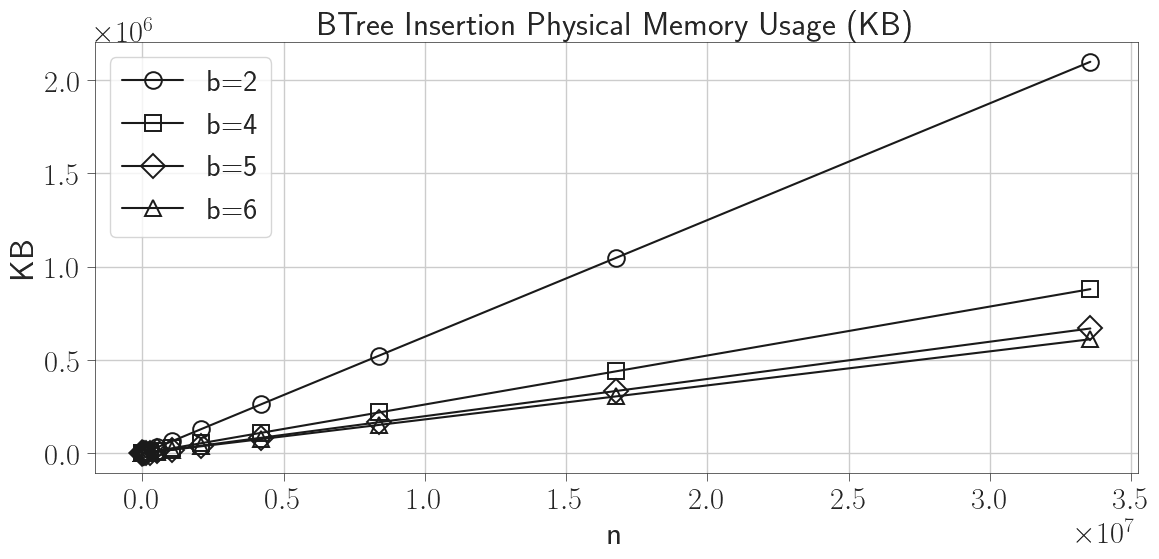

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)


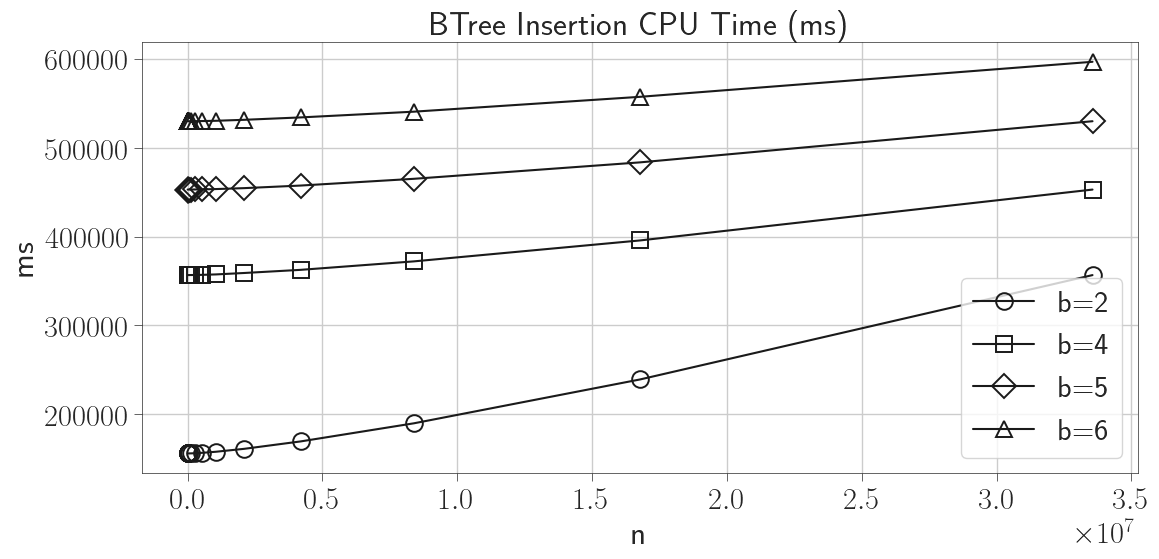

bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)


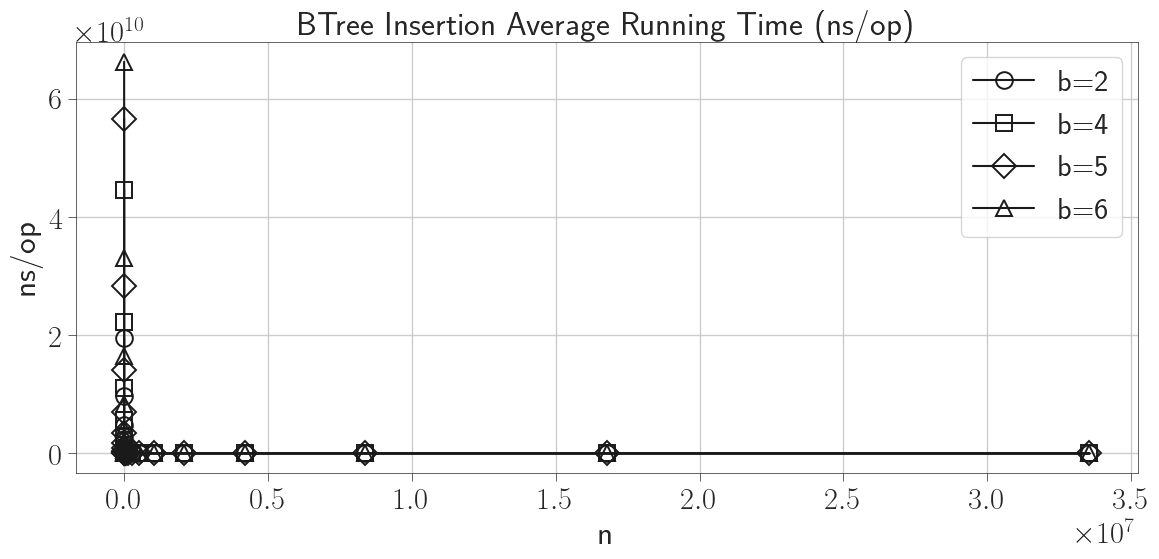

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]


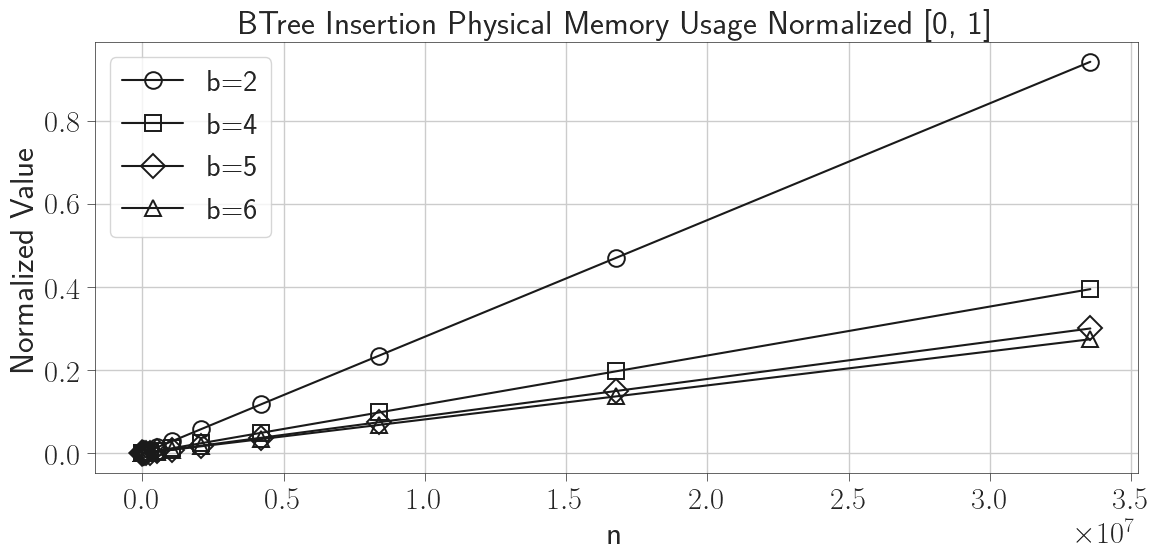

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)


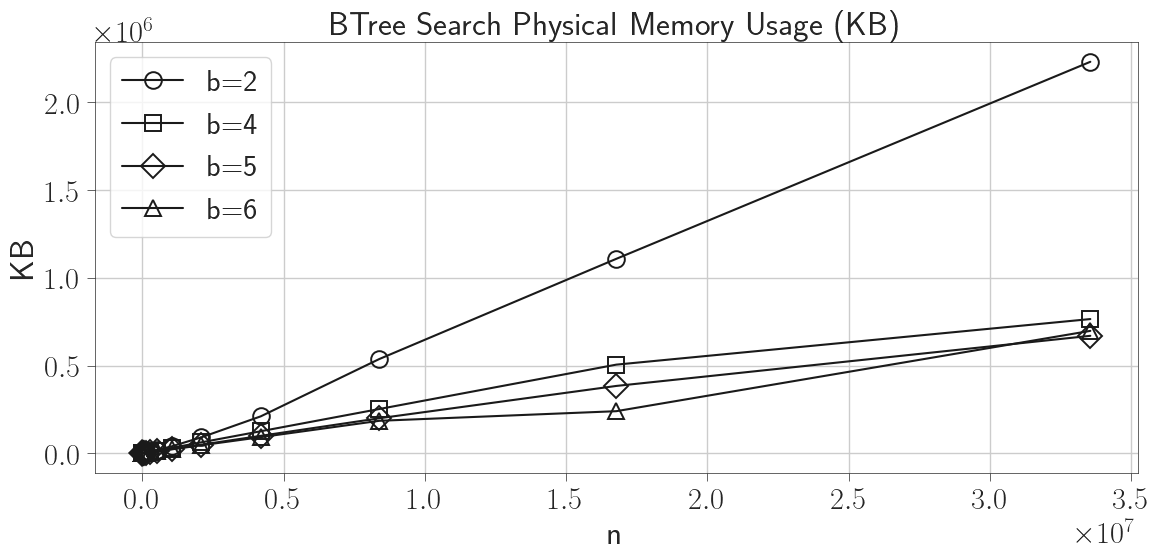

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)


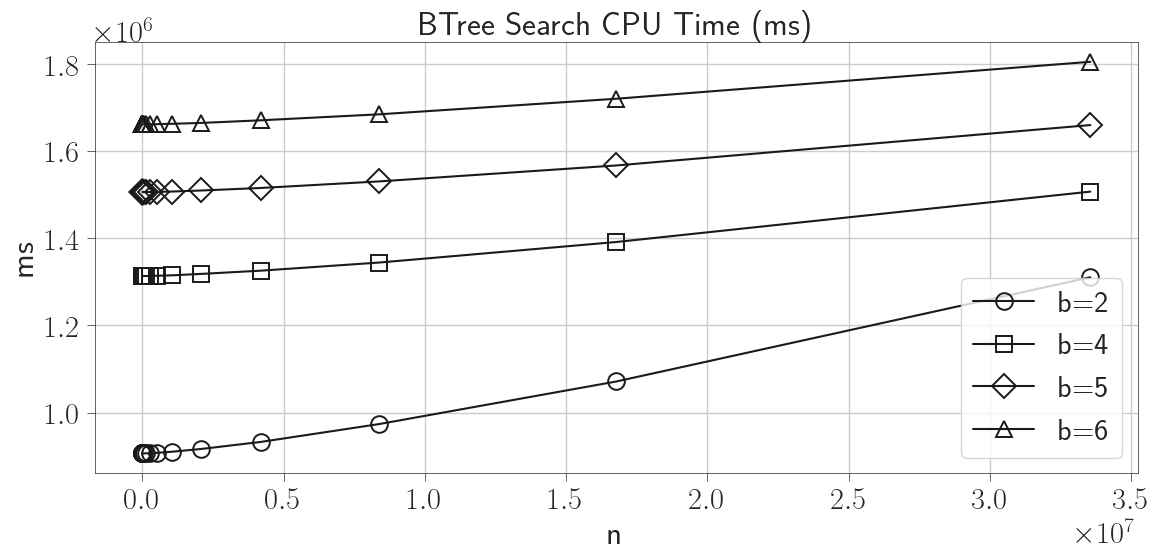

bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)
bt Average Running Time (ns/op)


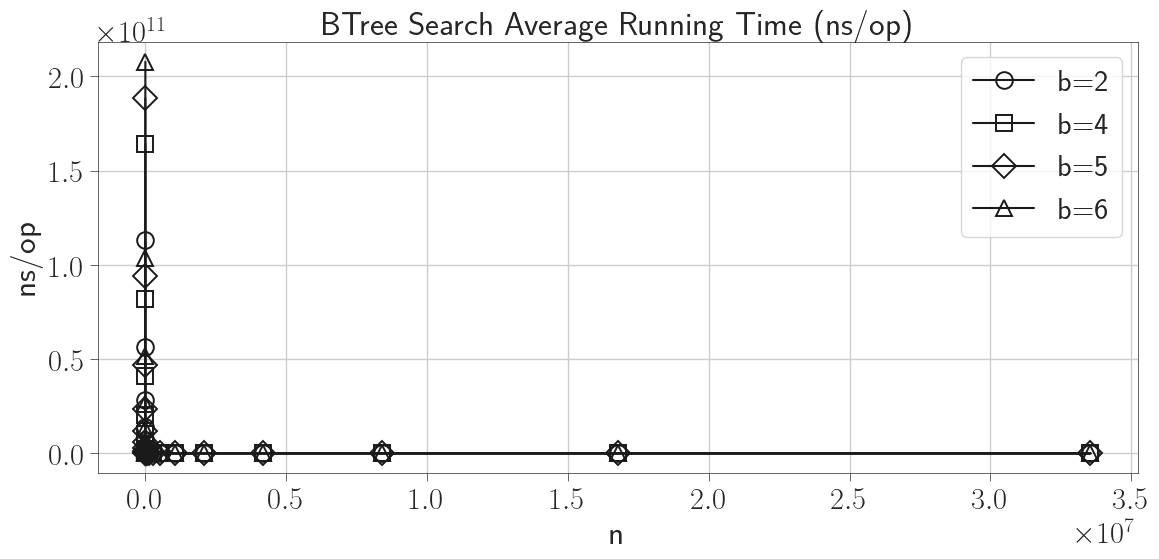

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]


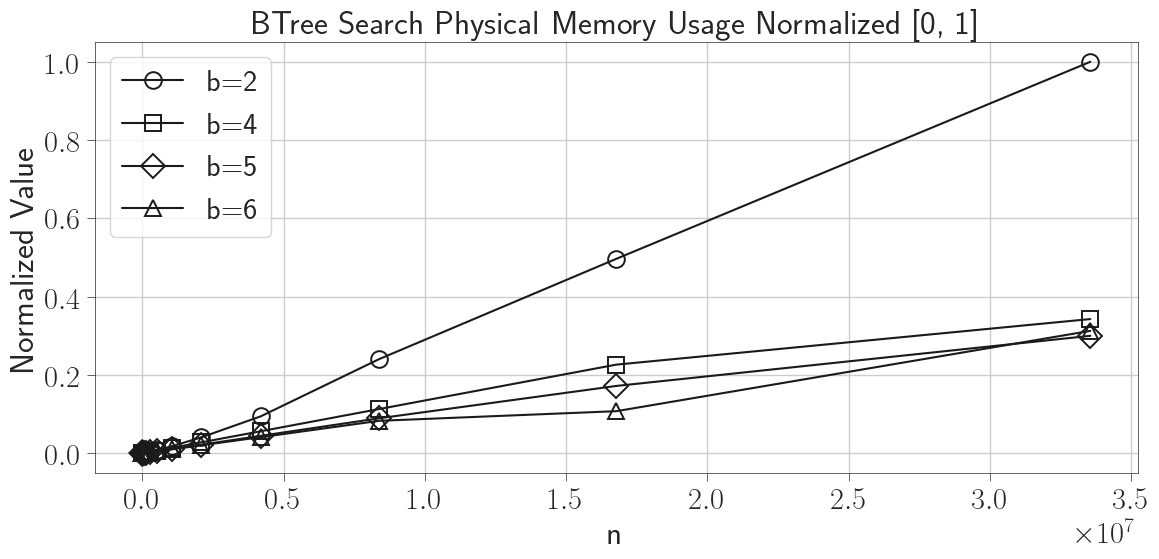

In [80]:
# Get unique names
# Columns to exclude from plotting
# Plot each unique name

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_filtered_btree_op = df_filtered_btree[df_filtered_btree['operation'] == op]
    df_filtered_map_op = df_filtered_map[df_filtered_map['operation'] == op]

    for column in df_filtered_btree.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(12, 6))

            marker_cyc = itertools.cycle(markers)

            for b in df_filtered_btree_op['b'].unique():
                print(f'bt {column}')
                sns.lineplot(
                    data=df_filtered_btree_op[df_filtered_btree_op['b'] == b],
                    x='n',
                    y=column,
                    marker=next(marker_cyc),
                    markerfacecolor='none',
                    markeredgecolor='k',
                    markeredgewidth=1.4,
                    markersize=12,
                    color='k',
                    linewidth=1.5,
                    label= f'b={int(b)}',
                    ax=ax
                )

            ax.set_title(f"BTree {op.title()} {column}")
            ax.set_xlabel('n')
            ax.set_ylabel(column)
            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            # plt.xticks(np.logspace(0, 2^20, num=12, base=2, dtype=int) )
            # ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            plt.tight_layout()
            plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_').replace('/', '_') + '.pdf', bbox_inches='tight')
            plt.show()